# <font color="darkblue"> Prática 01: Classificação binária com Redes Neurais </font>

**Objetivos:**


*   Utilizar a API Keras para classificação binária com redes neurais.

**Descrição:**

Com base em informações fornecidadas de 303 pessoas, as quais incluem idade, pressão arterial, nível de colesterol, frequência cardíaca, entre outros, crie uma rede neural para prever as chances de indivíduo ter um um infarto. Implemente as células cujos labels indicadores estão em vermelho.  

# <font color="darkblue"> Solução </font>

### Bibliotecas

In [4]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]
Pandas: 2.0.3
Numpy: 1.25.1
Sklearn: 1.3.2
Matplotlib: 3.7.2
Keras: 3.2.1


### Leitura das instâncias

In [5]:
BATCH_SIZE = 16
RANDOM_STATE = 2

data = pd.read_csv("heart.csv")

X = np.array(data.drop(['output'], axis=1))
y = np.array(data['output'])

### Explorando os dados

In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

print(f"Shape: {data.shape}")
data.head()

Shape: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


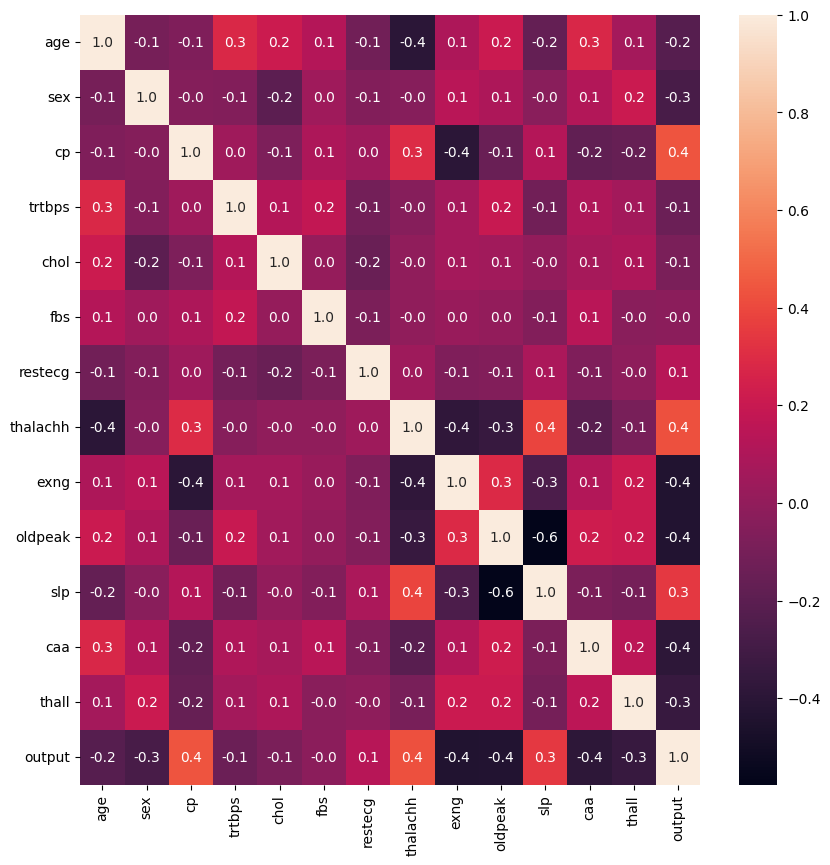

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

### Criando a rede neural

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(100, input_dim=13, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Instanciação e configuração de otimizadores
sgd = optimizers.SGD(learning_rate=0.01)

# Compila o modelo
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

None


### Treinando a rede neural

In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=BATCH_SIZE)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5726 - loss: 0.6853   
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5893 - loss: 0.6671 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5186 - loss: 0.7046 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.6597 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5503 - loss: 0.6919  
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5647 - loss: 0.6881 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5598 - loss: 0.6839 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5499 - loss: 0.6888 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5843 - loss: 0.6782 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5745 - loss: 0.6910 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 0.6737 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

### Performance do modelo

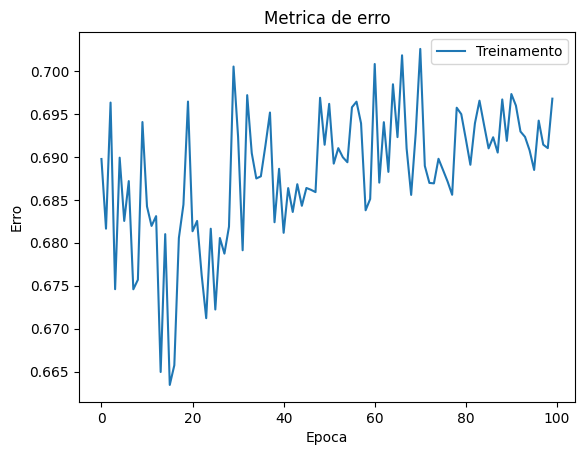

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
--> Acuracia (treino): 0.5620
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
--> Acuracia (teste): 0.4754

E_out - E_in = 0.0866


In [10]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

pred = np.round(model.predict(X_train, batch_size=BATCH_SIZE))
acc_train = accuracy_score(y_train, pred)
print(f'--> Acuracia (treino): {acc_train:.4f}')

pred = np.round(model.predict(X_test))
acc_test = accuracy_score(y_test, pred)
print(f'--> Acuracia (teste): {acc_test:.4f}')

print(f'\nE_out - E_in = {acc_train - acc_test:.4f}')

<span style="color:red; font-size: 17px; font-weight: bold;">Crie uma rede neural usando a teoria da Dimensão VC para determinar o número máximo de neurônios $n$ na camada escondida:</span>
</br></br>

<span style="color:red; font-size: 20px">
 $n \le \lfloor \frac{\lvert DS \rvert - 10}{10\times (d+2)} \rfloor  $
</span>

In [11]:
len(X_train) - 10

232

In [12]:
(len(X_train) - 10)/(10*15)

1.5466666666666666

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection



# Divida os dados em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# Crie a arquitetura da rede neural
model = Sequential()

# Configure a rede a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(2, input_dim=13, kernel_initializer='normal', activation='tanh')) #quantidade de neuronios na camada escondida, nº de features
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

# Gradiente Descendente
sgd = optimizers.SGD(learning_rate=0.01)

# Compile o modelo
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Usando validação para verificar se há overfitting

In [14]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4562 - loss: 0.6971 - val_accuracy: 0.4490 - val_loss: 0.6959
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4310 - loss: 0.6965 - val_accuracy: 0.6735 - val_loss: 0.6923
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5055 - loss: 0.6928 - val_accuracy: 0.4490 - val_loss: 0.6914
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5074 - loss: 0.6927 - val_accuracy: 0.4490 - val_loss: 0.6890
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5321 - loss: 0.6913 - val_accuracy: 0.5714 - val_loss: 0.6906
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6362 - loss: 0.6892 - val_accuracy: 0.5102 - val_loss: 0.6930
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5773 - loss: 0.6897 - val_accuracy: 0.7347 - val_loss: 0.6849
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6307 - loss: 0.6889 - val_accuracy: 0.4490 - val_loss: 0.6983

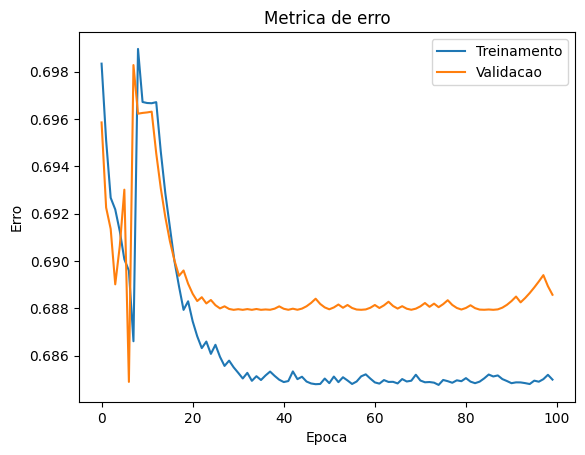

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
--> Acuracia (treino): 0.5648
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
--> Acuracia (teste): 0.4754


In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

pred = np.round(model.predict(X_test))
print(f'--> Acuracia (teste): {accuracy_score(y_test, pred):.4f}')

<span style="color:red; font-size: 18px; font-weight: bold;">Crie uma rede neural para gerar overfitting</span>

In [16]:
# Normalizacao de dados
min_values = X.min(axis=0)
max_values = X.max(axis=0)
X = (X - min_values) / (max_values - min_values)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# CONTINUE AQUI O RESTANTE DO CÓDIGO

# Crie a arquitetura da rede neural
model = Sequential()

# Configure a rede a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(200, input_dim=13, kernel_initializer='normal', activation='relu')) #quantidade de neuronios na camada escondida, nº de features
model.add(Dense(200, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

# Gradiente Descendente

# Compile o modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())

c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 200)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,201 (168.75 KB)

 Trainable params: 43,201 (168.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6435 - loss: 0.6800
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.6125 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7532 - loss: 0.5268 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8181 - loss: 0.4253 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4501 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7896 - loss: 0.4300 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8431 - loss: 0.3764 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8450 - loss: 0.3751 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.4011 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8264 - loss: 0.3647 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3409 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

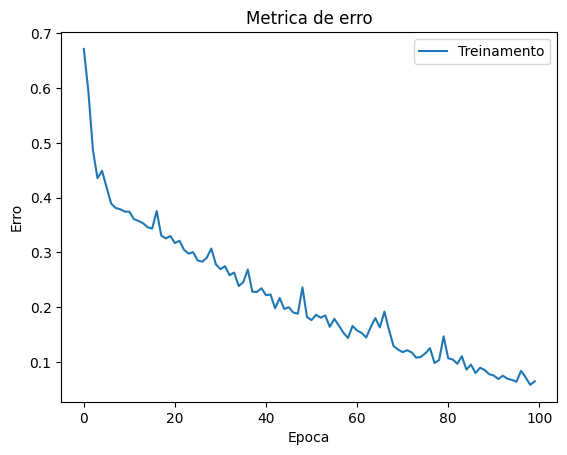

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
--> Acuracia (treino): 0.9793
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
--> Acuracia (teste): 0.8852

E_out - E_in = 0.0941


In [18]:

plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

pred = np.round(model.predict(X_train, batch_size=32))
acc_train = accuracy_score(y_train, pred)
print(f'--> Acuracia (treino): {acc_train:.4f}')

pred = np.round(model.predict(X_test))
acc_test = accuracy_score(y_test, pred)
print(f'--> Acuracia (teste): {acc_test:.4f}')

print(f'\nE_out - E_in = {acc_train - acc_test:.4f}')

### Tratando o overfitting

In [19]:
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

# Criando a arquitetura da rede neural
model = Sequential()

# Após o teste anterior, testem a rede neural abaixo, treinando-a com o Early Stopping
model.add(Dense(260, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(260, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

print(model.summary())

# Treinamento SEM Early Stopping
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=32)

# Treinamento COM Early Stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=32, callbacks=[es])


c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 260)            │         3,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 260)            │        67,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           261 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,761 (280.32 KB)

 Trainable params: 71,761 (280.32 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6416 - loss: 2.3604 - val_accuracy: 0.5246 - val_loss: 2.0576
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6379 - loss: 1.9667 - val_accuracy: 0.6721 - val_loss: 1.7247
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7058 - loss: 1.6463 - val_accuracy: 0.7377 - val_loss: 1.4512
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7619 - loss: 1.3860 - val_accuracy: 0.8197 - val_loss: 1.2194
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8078 - loss: 1.1765 - val_accuracy: 0.8361 - val_loss: 1.0230
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8201 - loss: 1.0000 - val_accuracy: 0.8361 - val_loss: 0.8791
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8625 - loss: 0.8536 - val_accuracy: 0.8361 - val_loss: 0.7604
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7674 - loss: 0.7966 - val_accuracy: 0.8361 - val_loss: 0

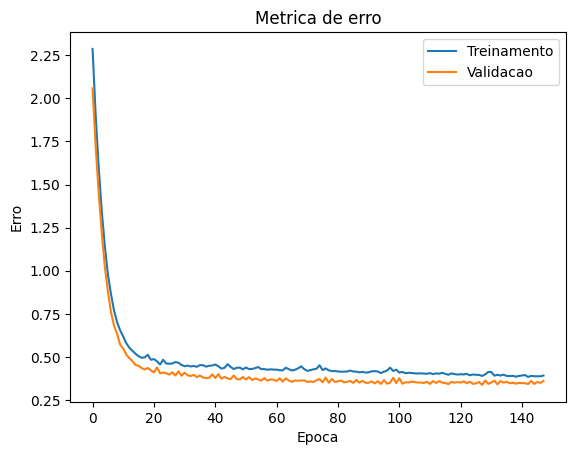

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
--> Acuracia (train): 0.8512
--> Acuracia (test): 0.8852


In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

print(f'--> Acuracia (train): {accuracy_score(y_train, pred_train):.4f}')
print(f'--> Acuracia (test): {accuracy_score(y_test, pred):.4f}')

### Usando o K-Fold Cross Validation para validar o modelo usando todo o conjunto de treinamento

In [21]:
from sklearn.model_selection import StratifiedKFold

# Garante que cada fold esteja balanceado
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Inicializa a lista de armazenar os acurácias de cada fold
accuracies = []

# Executa a validação para cada fold
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Criando a arquitetura da rede neural
    model = Sequential()
    model.add(Dense(200, input_dim=13, kernel_regularizer=regularizers.l2(0.01), kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    # Compila o modelo
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

    print(model.summary())

    # Treina o modelo
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)

    # Avalia o modelo
    _, accuracy = model.evaluate(X_train_fold, y_train_fold, verbose=0)
    accuracies.append(accuracy)

# Calcula a acurácia média
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)

c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 200)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,201 (168.75 KB)

 Trainable params: 43,201 (168.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5373 - loss: 1.7100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5793 - loss: 1.5010 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.6928 - loss: 1.3282  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.6758 - loss: 1.1890  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 1.0839 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7642 - loss: 0.9879 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8112 - loss: 0.8934  
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7820 - loss: 0.8396  
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8016 - loss: 0.7840 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8083 - loss: 0.7347 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7664 - loss: 0.7058  
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8116 - 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 200)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,201 (168.75 KB)

 Trainable params: 43,201 (168.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5681 - loss: 1.7022
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.6946 - loss: 1.4913
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5953 - loss: 1.3223 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6996 - loss: 1.1753 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7585 - loss: 1.0604 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7114 - loss: 0.9790 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.7724 - loss: 0.8802
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.8050 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.7467 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7691 - loss: 0.7235 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8196 - loss: 0.6557 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8056

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 200)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,201 (168.75 KB)

 Trainable params: 43,201 (168.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5799 - loss: 1.6951
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 1.4806 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6417 - loss: 1.3112 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6279 - loss: 1.1740 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7037 - loss: 1.0473 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7741 - loss: 0.9378 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8096 - loss: 0.8456  
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.7614 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8153 - loss: 0.7090 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8382 - loss: 0.6473 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8103 - loss: 0.6295 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8302 -

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 200)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,201 (168.75 KB)

 Trainable params: 43,201 (168.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4984 - loss: 1.7056
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7769 - loss: 1.4951 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 86us/step - accuracy: 0.7740 - loss: 1.3260
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 1.1823  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7747 - loss: 1.0619 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7928 - loss: 0.9559 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7867 - loss: 0.8823 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8317 - loss: 0.7943
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8138 - loss: 0.7295  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8034 - loss: 0.6739 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8174 - loss: 0.6321 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8217 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 200)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,201 (168.75 KB)

 Trainable params: 43,201 (168.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5795 - loss: 1.7134
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 1.4950 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7055 - loss: 1.3209 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6672 - loss: 1.1771 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 1.0521 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6888 - loss: 0.9599 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.8649 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8167 - loss: 0.7757 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8192 - loss: 0.7080 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8105 - loss: 0.6726 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8169 - loss: 0.6340 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7935 -